/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead


Text(0.5, 1.0, 'Output image')

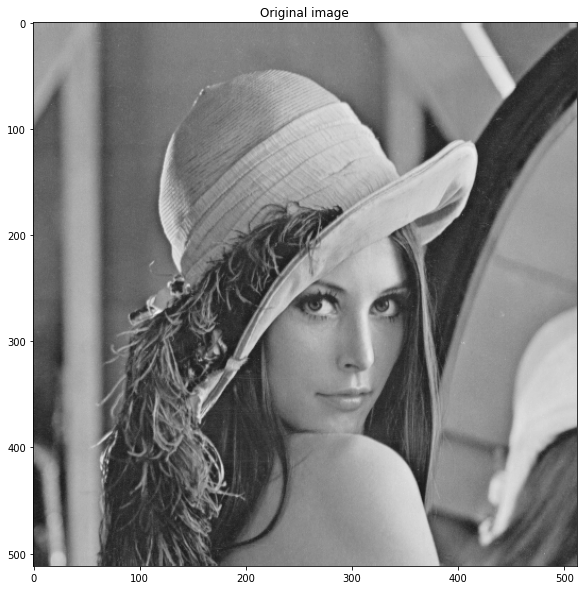

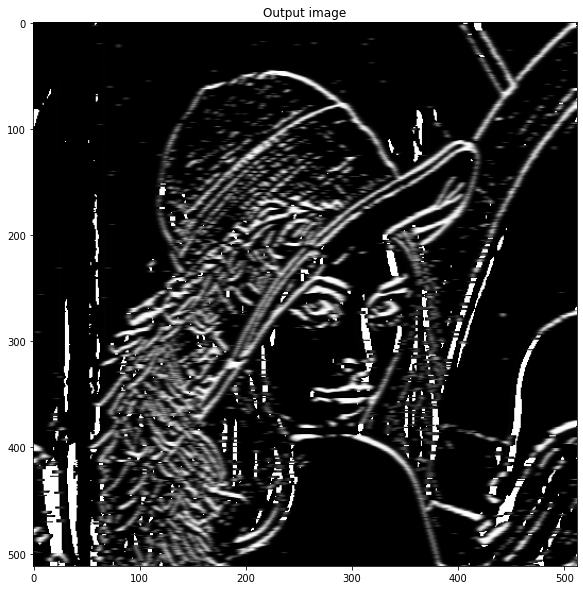

In [4]:
%matplotlib inline
from IPython.display import display, Math, Latex
from skimage import data, feature, color, img_as_float, filters
import scipy as sp
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

url = 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')

# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title("Original image")


LoG = nd.gaussian_laplace(img , 2)
thres = np.absolute(LoG).mean() * 0.75
output = sp.zeros(LoG.shape)
w = output.shape[1]
h = output.shape[0]

for y in range(1, h - 1):
    for x in range(1, w - 1):
        patch = LoG[y-1:y+2, x-1:x+2]
        p = LoG[y, x]
        maxP = patch.max()
        minP = patch.min()
        if (p > 0):
            zeroCross = True if minP < 0 else False
        else:
            zeroCross = True if maxP > 0 else False
        if ((maxP - minP) > thres) and zeroCross:
            output[y, x] = 1


# display the image
figsize = (10,10)
plt.figure(figsize=figsize)

plt.imshow(LoG, cmap='gray', vmin=0, vmax=255)
plt.title("Output image")